#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os  # windows uzerinde operasyon yapmak icin Operation Systems 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

"""import warnings;
warnings.filterwarnings('ignore')"""


"import warnings;\nwarnings.filterwarnings('ignore')"

#### Merge data from each month into one CSV

In [2]:
files = [file for file in os.listdir("./Sales_Data")] # We took 12 csv file easily.
all_months_data = pd.DataFrame() # We create null DF. We'll add 12 csv into to this DF.

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])
    
all_months_data.to_csv("my_all_months.csv" , index = False)

# SalesAnalysis in icine olusturdu my_all_months u, biz Sales_Data'nin icine tasidik

In [3]:
os.listdir('./Sales_Data')  # Sales_Data klasorundeki tum dosyalari liste icinde getirdi

['my_all_months.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

#### Read in updated dataframe

In [4]:
df = pd.read_csv("./Sales_Data/my_all_months.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [6]:
df.isna().sum()  # 545 tane her bir satiri nan olan deger var, tum satir bos yani

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df[df.isna().any(axis=1)]  # yukaridaki tespitimizi dogruladik

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


##### Drop rows of NAN

In [8]:
df.dropna(how='all', axis=0, inplace=True)  # satirlarin tamami bos ise sil demis olduk
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##### Get rid of text in order date column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [11]:
df["Order Date"].value_counts()

Order Date        355
12/15/19 20:16      8
10/30/19 21:28      7
12/11/19 13:24      7
04/02/19 13:24      7
                 ... 
01/18/19 18:04      1
01/07/19 19:48      1
01/23/19 17:59      1
01/26/19 10:28      1
09/30/19 00:18      1
Name: Order Date, Length: 142396, dtype: int64

In [12]:
df["Order Date"] == 'Order Date'

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order Date, Length: 186305, dtype: bool

In [13]:
df[df["Order Date"] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
df["Order Date"].apply(lambda x: np.nan if x=='Order Date' else x).value_counts()  # order datelerden kurtuldugumuzu gorduk istedigimiz gibi 

12/15/19 20:16    8
12/11/19 13:24    7
10/30/19 21:28    7
04/02/19 13:24    7
12/12/19 09:48    6
                 ..
01/18/19 18:04    1
01/07/19 19:48    1
01/23/19 17:59    1
01/26/19 10:28    1
09/30/19 00:18    1
Name: Order Date, Length: 142395, dtype: int64

In [15]:
df["Order Date"].apply(lambda x: np.nan if x=='Order Date' else x).value_counts(dropna=False) # nanlari dusurmezsek nasil olur onu gorduk

NaN               355
12/15/19 20:16      8
10/30/19 21:28      7
12/11/19 13:24      7
04/02/19 13:24      7
                 ... 
01/18/19 18:04      1
01/07/19 19:48      1
01/23/19 17:59      1
01/26/19 10:28      1
09/30/19 00:18      1
Name: Order Date, Length: 142396, dtype: int64

In [16]:
df["Order Date"] = df["Order Date"].apply(lambda x: np.nan if x=='Order Date' else x)
df['Order Date'].isna().value_counts()  # basariyla nan a dondurduk, 355 tane nan old.nu gorduk

False    185950
True        355
Name: Order Date, dtype: int64

In [17]:
df.isna().sum()  # yine nan lari gormek icin yaptik

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          355
Purchase Address      0
dtype: int64

In [18]:
df.dropna(inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Make columns correct type

In [20]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [21]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [22]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32") # df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = df["Price Each"].astype("float32")    # df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Order Date"] = df["Order Date"].astype("datetime64") # df["Order Date"] = pd.to_datetime(df["Order Date"])

In [23]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Augment data with additional columns

#### Add month column

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [25]:
df["Order Date"][0]

Timestamp('2019-04-19 08:46:00')

In [26]:
df["Order Date"].dt.month

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Order Date, Length: 185950, dtype: int64

In [27]:
df["Month"] = df["Order Date"].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [28]:
#df["Order Date"] = df["Order Date"].astype("object")
#df.dtypes

In [29]:
# df["Order Date"].str.split("-") bunu month a atayadabiliriz

#### Add city column

In [30]:
df["Purchase Address"][0]

'917 1st St, Dallas, TX 75001'

In [31]:
df["City"] = df["Purchase Address"].str.split(",")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"[917 1st St, Dallas, TX 75001]"
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"[682 Chestnut St, Boston, MA 02215]"
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"[669 Spruce St, Los Angeles, CA 90001]"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"[669 Spruce St, Los Angeles, CA 90001]"
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"[333 8th St, Los Angeles, CA 90001]"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"[840 Highland St, Los Angeles, CA 90001]"
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"[216 Dogwood St, San Francisco, CA 94016]"
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"[220 12th St, San Francisco, CA 94016]"
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"[511 Forest St, San Francisco, CA 94016]"


In [32]:
df["City"] = df["City"].apply(lambda x: x[1])

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [33]:
# 1. Yol
df["Price_Total"] = df["Quantity Ordered"] * df["Price Each"]

In [45]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.989998
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.990000
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.970000
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.000000
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.000000
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.989990


In [38]:
df.groupby("Month").sum()["Price_Total"]

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Price_Total, dtype: float64

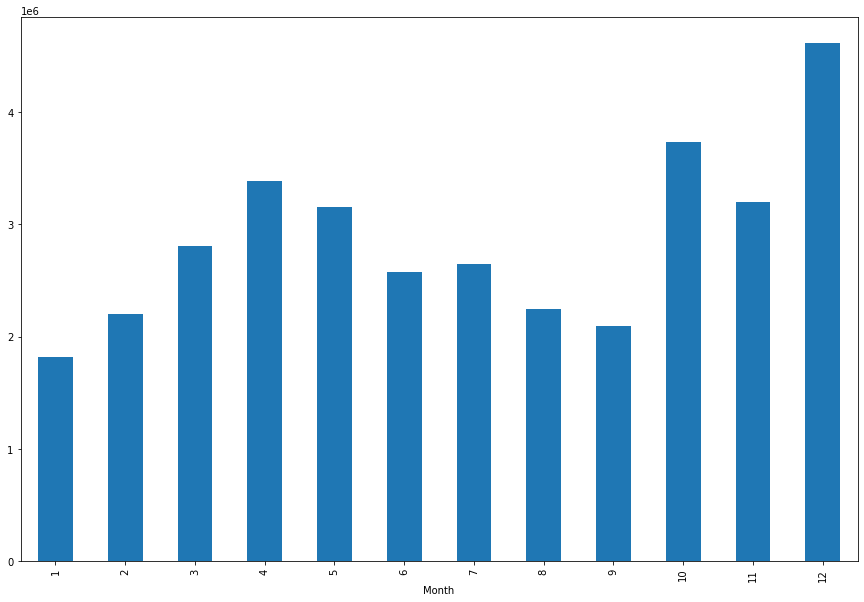

In [40]:
df.groupby("Month").sum()["Price_Total"].plot(kind="bar", figsize=(15, 10));

# groupby dan sonra bir agg fonk. kullanmak zorundayiz

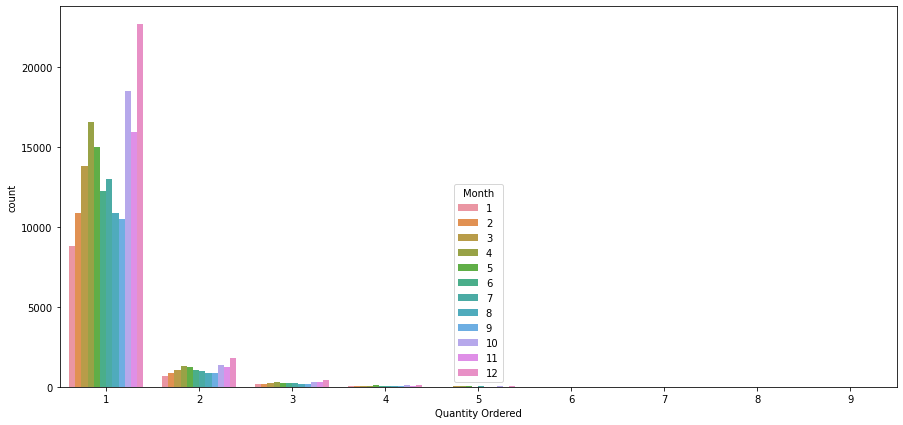

In [41]:
# Fehmi'nin cozumu
plt.figure(figsize = (15,7))
sns.countplot(data= df, x="Quantity Ordered", hue = "Month");

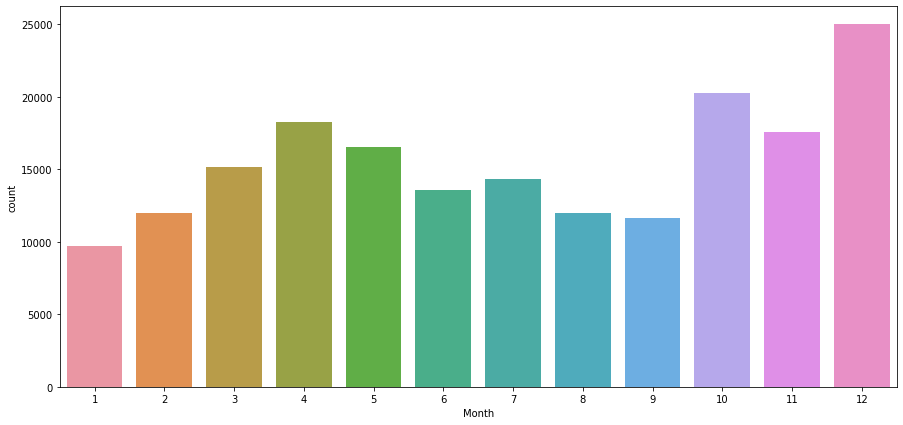

In [44]:
# Fehmi'nin cozumu
plt.figure(figsize = (15,7))
sns.countplot(data= df, x="Month");

#### Question 2: What city sold the most product?

In [46]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.989998
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.990000
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.970000
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.000000
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.000000
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.989990


In [48]:
df.groupby("City").sum()["Quantity Ordered"]

City
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int32

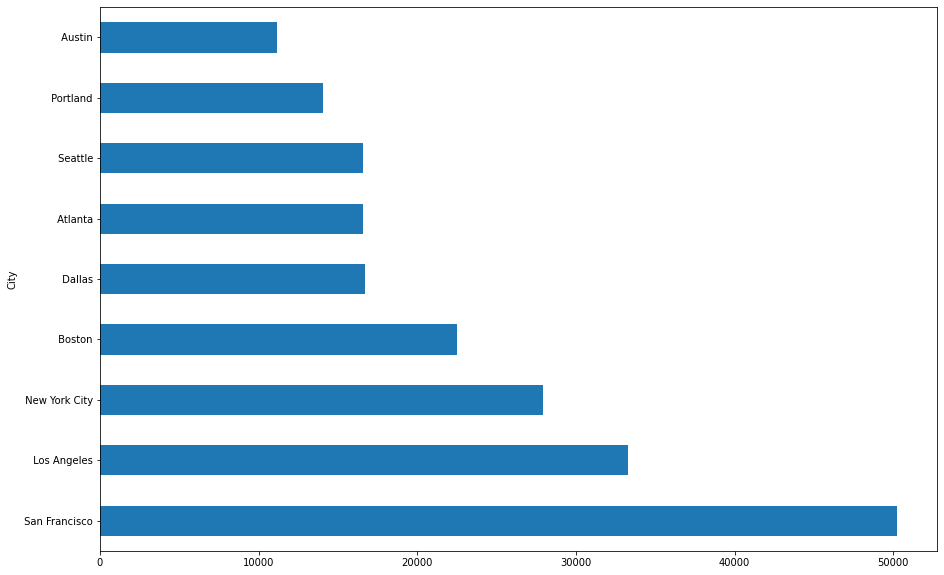

In [51]:
df.groupby("City").sum()["Quantity Ordered"].sort_values(ascending=False).plot(kind="barh", figsize=(15, 10));  # barh horizontal - yatay veriyor

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [52]:
df["hour"] = df["Order Date"].dt.hour

In [54]:
df.groupby("hour").sum()["Price_Total"].sort_values(ascending=False)

hour
19    2.412939e+06
12    2.316821e+06
11    2.300610e+06
20    2.281716e+06
18    2.219348e+06
13    2.155390e+06
17    2.129362e+06
14    2.083673e+06
21    2.042001e+06
10    1.944287e+06
15    1.941550e+06
16    1.904601e+06
9     1.639031e+06
22    1.607549e+06
8     1.192349e+06
23    1.179304e+06
7     7.448541e+05
0     7.137213e+05
1     4.608669e+05
6     4.481130e+05
2     2.348514e+05
5     2.306798e+05
4     1.626610e+05
3     1.457579e+05
Name: Price_Total, dtype: float64

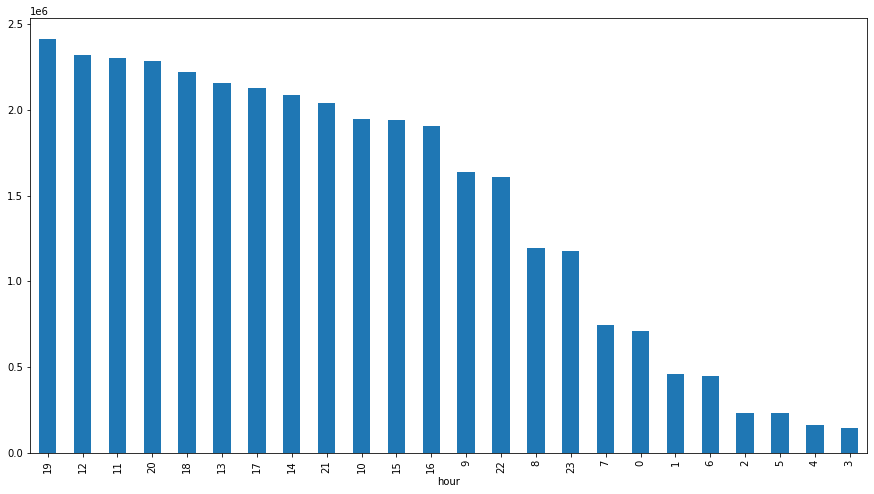

In [56]:
df.groupby("hour").sum()["Price_Total"].sort_values(ascending=False).plot(kind="bar", figsize=(15, 8));

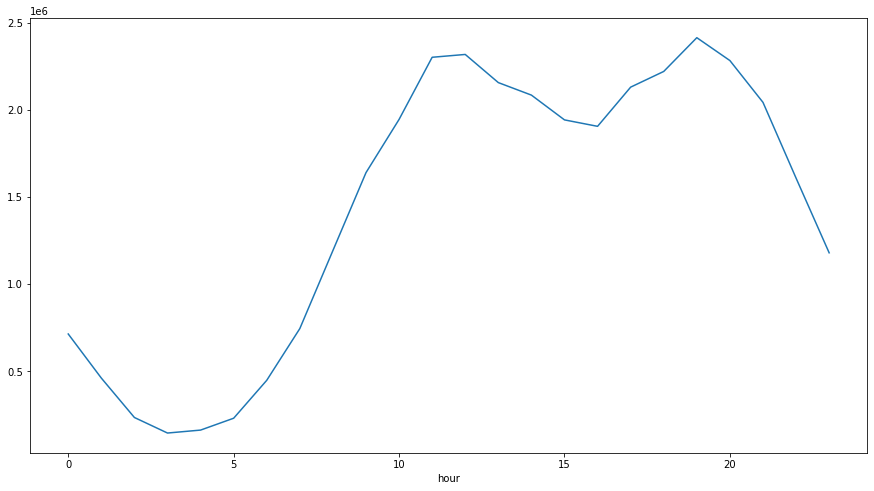

In [57]:
df.groupby("hour").sum()["Price_Total"].plot(kind="line", figsize=(15, 8));

#### Question 4: What products are most often sold together?

In [58]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total,hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.900000,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.989998,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.990000,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.970000,20
186846,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.000000,16
186847,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.000000,7
186848,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.989990,17


#### What product sold the most? Why do you think it sold the most?

In [59]:
df_new = df[df["Order ID"].duplicated(keep=False)]
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

In [60]:
df_new
# Order ID den birden fazla olanlari tutmus olduk, cunku beraber satilan urunleri ariyoruz

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total,hour
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000,14
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,600.000000,19
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,11.950000,19
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,99.989998,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.840000,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta,3.840000,20
186803,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,11.990000,0
186804,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,5.980000,0
186841,259350,Google Phone,1,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,San Francisco,600.000000,13


In [62]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_new["Grouped"] = df_new.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df_new  # burada 2 kere gosterdigi icin order id lerden hala onlari dusurecegiz bir sonraki asamada

C:\Users\hatic\AppData\Local\Temp\ipykernel_23184\3866336354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Grouped"] = df_new.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Price_Total,hour,Grouped
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.000000,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.990000,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,600.000000,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,11.950000,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,99.989998,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.840000,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta,3.840000,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,11.990000,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,5.980000,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,San Francisco,600.000000,13,"Google Phone,USB-C Charging Cable"


In [64]:
df_new2 = df_new[["Order ID", "Grouped"]].drop_duplicates()
df_new2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [61]:
df_new.groupby("Order ID")["Product"].sum()  # order id si ayni olan urunleri yani beraber satilan urunleri gormus olduk

Order ID
141275              USB-C Charging CableWired Headphones
141290     Apple Airpods HeadphonesAA Batteries (4-pack)
141365                   Vareebadd PhoneWired Headphones
141384                  Google PhoneUSB-C Charging Cable
141450            Google PhoneBose SoundSport Headphones
                               ...                      
319536                Macbook Pro LaptopWired Headphones
319556                      Google PhoneWired Headphones
319584                            iPhoneWired Headphones
319596                    iPhoneLightning Charging Cable
319631    34in Ultrawide MonitorLightning Charging Cable
Name: Product, Length: 7136, dtype: object